# Preprocess

In [41]:
import cv2
import numpy as np

In [3]:
import thinning

In [38]:
import cv2
import thinning
import numpy as np

img = cv2.imread("./download.jpeg", 0)
adap = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,11,2)

ret, img = cv2.threshold(img, 200, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((4, 4), np.uint8)

thinned = cv2.erode(thinned, kernel, iterations = 1)
thinned = thinning.guo_hall_thinning(img)


resized = cv2.resize(thinned, None, fx = 0.5, fy = 0.5)
cv2.imwrite("./thinned.png", resized)

True

In [122]:
image = cv2.imread('licence.jpg', 0)
cv2.imshow('Edges after contouring', image)
cv2.waitKey(0)

# image = cv2.GaussianBlur(image, (3, 3), 0)
# kernel = np.array([[-1, 2, -1],
#                    [-1, 2, -1],
#                    [-1, 2, -1]])
kernel = np.ones((4, 4), np.uint8)
print(kernel)
# image = cv2.dilate(image, kernel, iterations = 1)

ret, threshold = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

erosion = cv2.erode(threshold, kernel, iterations = 1)
cv2.imshow('Erosion', erosion)
cv2.waitKey()

# closing = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)
# cv2.imshow('Closing', closing)
# cv2.waitKey()

resized = cv2.resize(erosion, None, fx = 0.5, fy = 0.5)
cv2.imshow('Edges after contouring', resized)
cv2.waitKey(0)

edges = cv2.Canny(threshold, 30, 200)
cv2.imshow('Edges', edges)
cv2.waitKey(0)

cv2.destroyAllWindows()

[[1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]
 [1 1 1 1]]


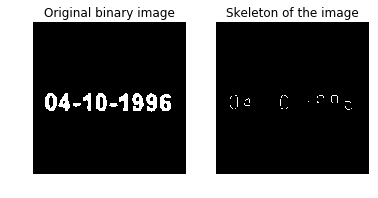

In [109]:
import matplotlib
import matplotlib.pyplot as plt
import skimage.io as io
"load image data"
# Img_Original =  io.imread( 'download.jpeg')      # Gray image, rgb images need pre-conversion
Img_Original = cv2.imread('cropped.jpg', 0)
"Convert gray images to binary images using Otsu's method"
from skimage.filters import threshold_otsu
Otsu_Threshold = threshold_otsu(Img_Original)   
BW_Original = Img_Original < Otsu_Threshold    # must set object region as 1, background region as 0 !

# def neighbours(x,y,image):
#     "Return 8-neighbours of image point P1(x,y), in a clockwise order"
#     img = image
#     x_1, y_1, x1, y1 = x-1, y-1, x+1, y+1
#     return [ img[x_1][y], img[x_1][y1], img[x][y1], img[x1][y1],     # P2,P3,P4,P5
#                 img[x1][y], img[x1][y_1], img[x][y_1], img[x_1][y_1] ]    # P6,P7,P8,P9

# def transitions(neighbours):
#     "No. of 0,1 patterns (transitions from 0 to 1) in the ordered sequence"
#     n = neighbours + neighbours[0:1]      # P2, P3, ... , P8, P9, P2
#     return sum( (n1, n2) == (0, 1) for n1, n2 in zip(n, n[1:]) )  # (P2,P3), (P3,P4), ... , (P8,P9), (P9,P2)

# def zhangSuen(image):
#     "the Zhang-Suen Thinning Algorithm"
#     Image_Thinned = image.copy()  # deepcopy to protect the original image
#     changing1 = changing2 = 1        #  the points to be removed (set as 0)
#     while changing1 or changing2:   #  iterates until no further changes occur in the image
#         # Step 1
#         changing1 = []
#         rows, columns = Image_Thinned.shape[0],Image_Thinned.shape[1]               # x for rows, y for columns
#         for x in range(1, rows - 1):                     # No. of  rows
#             for y in range(1, columns - 1):            # No. of columns
#                 P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
                
#                 if (Image_Thinned[x][y] == 1     and    # Condition 0: Point P1 in the object regions 
#                     2 <= sum(n) <= 6   and    # Condition 1: 2<= N(P1) <= 6
#                     transitions(n) == 1 and    # Condition 2: S(P1)=1  
#                     P2 * P4 * P6 == 0  and    # Condition 3   
#                     P4 * P6 * P8 == 0):         # Condition 4
#                     changing1.append((x,y))
#         for x, y in changing1: 
#             Image_Thinned[x][y] = 0
#         # Step 2
#         changing2 = []
#         for x in range(1, rows - 1):
#             for y in range(1, columns - 1):
#                 P2,P3,P4,P5,P6,P7,P8,P9 = n = neighbours(x, y, Image_Thinned)
#                 if (Image_Thinned[x][y] == 1   and        # Condition 0
#                     2 <= sum(n) <= 6  and       # Condition 1
#                     transitions(n) == 1 and      # Condition 2
#                     P2 * P4 * P8 == 0 and       # Condition 3
#                     P2 * P6 * P8 == 0):            # Condition 4
#                     changing2.append((x,y))    
#         for x, y in changing2: 
#             Image_Thinned[x][y] = 0
#     return Image_Thinned

def neighbours_vec(image):
    return image[2:,1:-1], image[2:,2:], image[1:-1,2:], image[:-2,2:], image[:-2,1:-1],     image[:-2,:-2], image[1:-1,:-2], image[2:,:-2]

def transitions_vec(P2, P3, P4, P5, P6, P7, P8, P9):
    return ((P3-P2) > 0).astype(int) + ((P4-P3) > 0).astype(int) + \
    ((P5-P4) > 0).astype(int) + ((P6-P5) > 0).astype(int) + \
    ((P7-P6) > 0).astype(int) + ((P8-P7) > 0).astype(int) + \
    ((P9-P8) > 0).astype(int) + ((P2-P9) > 0).astype(int)

def zhangSuen_vec(image, iterations):
    for iter in range (1, iterations):
        print(iter)
        # step 1    
        P2,P3,P4,P5,P6,P7,P8,P9 = neighbours_vec(image)
        condition0 = image[1:-1,1:-1]
        condition4 = P4*P6*P8
        condition3 = P2*P4*P6
        condition2 = transitions_vec(P2, P3, P4, P5, P6, P7, P8, P9) == 1
        condition1 = (2 <= P2+P3+P4+P5+P6+P7+P8+P9) * (P2+P3+P4+P5+P6+P7+P8+P9 <= 8)
        cond = (condition0 == 1) * (condition4 == 0) * (condition3 == 0) * (condition2 == 1) * (condition1 == 1)
        changing1 = numpy.where(cond == 1)
        image[changing1[0]+1,changing1[1]+1] = 0
        # step 2
        P2,P3,P4,P5,P6,P7,P8,P9 = neighbours_vec(image)
        condition0 = image[1:-1,1:-1]
        condition4 = P2*P6*P8
        condition3 = P2*P4*P8
        condition2 = transitions_vec(P2, P3, P4, P5, P6, P7, P8, P9) == 1
        condition1 = (2 <= P2+P3+P4+P5+P6+P7+P8+P9) * (P2+P3+P4+P5+P6+P7+P8+P9 <= 6)
        cond = (condition0 == 1) * (condition4 == 0) * (condition3 == 0) * (condition2 == 1) * (condition1 == 1)
        changing2 = numpy.where(cond == 1)
        image[changing2[0]+1,changing2[1]+1] = 0
    return image
 

"Apply the algorithm on images"
BW_Skeleton = zhangSuen(BW_Original)
# BW_Skeleton = BW_Original
"Display the results"
fig, ax = plt.subplots(1, 2)
ax1, ax2 = ax.ravel()
ax1.imshow(BW_Original, cmap=plt.cm.gray)
ax1.set_title('Original binary image')
ax1.axis('off')
ax2.imshow(BW_Skeleton, cmap=plt.cm.gray)
ax2.set_title('Skeleton of the image')
ax2.axis('off')
plt.show()

In [ ]:
from skimage.

In [56]:
img = cv2.imread('cropped.jpg',0)
size = np.size(img)
skel = np.zeros(img.shape,np.uint8)
 
ret,img = cv2.threshold(img,127,255,0)
element = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
done = False
 
while( not done):
    eroded = cv2.erode(img,element)
    temp = cv2.dilate(eroded,element)
    temp = cv2.subtract(img,temp)
    skel = cv2.bitwise_or(skel,temp)
    img = eroded.copy()
 
    zeros = size - cv2.countNonZero(img)
    if zeros==size:
        done = True
 
cv2.imshow("skel",skel)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


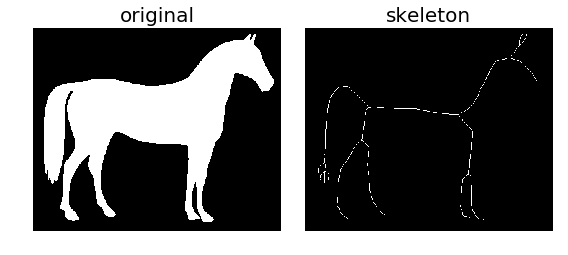

In [87]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
print(data.horse())
image = invert(data.horse())
print(image)

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

In [30]:
image = cv2.imread('licence.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
ret, threshold = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY_INV)

edges = cv2.Canny(image, 50, 220)
resized = cv2.resize(edges, None, fx = 0.5, fy = 0.5)
cv2.imshow('Edges', resized)
cv2.waitKey(0)

# Find Contours
_, contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(edges, contours, -1, (0,255,0), 2)
edges = cv2.resize(edges, None, fx = 0.5, fy = 0.5)
cv2.imshow('Edges after contouring', edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
kernel = np.ones((10, 1), np.uint8)
    img_dilation = cv2.dilate(word, kernel, iterations=1)
    im2, ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])
    character_list = []
    for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        #dimensions = [x, y, w, h]
        # Getting ROI
        roi = word[y:y + h, x:x + w]
        squared = makeSquare(roi)
        final = resize_to_pixel(28, squared)
        letter = characterPrediction(final)
        character_list.append(letter)
    return character_list

# Line Detection

# Word Detection

# Character Detection

In [3]:
import cv2
import numpy

In [25]:
# Image with shapes
image = cv2.imread('abc.jpg')
cv2.imshow('Original', image)
cv2.waitKey(0)

resized = cv2.resize(image, None, fx = 2, fy = 2)

# Grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#gray_blur = cv2.GaussianBlur(gray, (3, 3), 0)
# Find Canny Edges
edges = cv2.Canny(gray, 30, 200)
cv2.imshow('Edges', edges)
cv2.waitKey(0)

# Find Contours
_, contours, hierarchy = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
cv2.imshow('Edges after contouring', edges)
cv2.waitKey()

print('Number of Contours found = ' + str(len(contours)))

#contours = np.array(contours).reshape((-1,1,2)).astype(np.int32)
cv2.drawContours(resized, contours, -1, (0,255,0), 2)

cv2.imshow('Contours', resized)
cv2.waitKey(0)
cv2.destroyAllWindows()

Number of Contours found = 742


# Potential Segmentation Columns

In [36]:
import cv2
import os
import shutil
import numpy as np
from matplotlib.pyplot import imshow
from PIL import Image

'''
this function convert image into matrix of image rows
'''
def imgToMatrixR(img):
    # get dimensions
    height, width = img.shape
    matrix = []
    # getting pixels values for all rows
    for i in range(0, height):
        row = []
        for j in range(0, width):
            row.append(img[i,j])
        matrix.append(row)
    return matrix

'''
this function convert image into matrix of image columns
'''
def imgToMatrixC(img):
    # get dimensions
    height, width = img.shape
    matrix = []
    # getting pixels values for all columns
    for i in range(0, width):
        col = []
        for j in range(0, height):
            col.append(img[j, i])
        matrix.append(col)
    return matrix

'''
this function count a specific value (parameter p) in matrix
'''
def countPixel(matrix,p):
    counter = []
    for k in range(0, len(matrix)):
        counter.append(matrix[k].count(p))
    return counter

'''
this function searches for underlines  and replace the pixels that formed it with white pixels 
'''
def lineRemoval(img):
    min_length=140
    matrix = imgToMatrixR(img)
    for i in range(0, len(matrix)):
        row=matrix[i]
        start=-1
        end=0
        conn=0
        for j in range(0, len(row)):
            if (row[j]==0):
                conn=conn+1
                # first point in the line .
                if( start == -1 ):
                    start = j
                # last point in the row .
                if( j == len(row)-1 ):
                    end =j
                    if (conn > min_length):
                        img[i-2:i+4, start:end+1] = 255
                    start = -1
                    end = 0
                    conn = 0
            # end of the line
            else:
                end =j
                if (conn >min_length):
                    img[i-2:i+4, start:end+1] = 255
                start = -1
                end = 0
                conn = 0
    return img

'''
this function clears all horizontal boundaries around the input image
'''
def clearBounds_horiz(img):
    height, width = img.shape
    matrix = imgToMatrixR(img)
    white_counter = countPixel(matrix,255)

    for i in range (0,height):
        if(white_counter[i]>= width-1):
            img = img[1:height,0:width]
        else:
            break

    new_height, width = img.shape
    for i in range (1,height):
        if(white_counter[height-i]>= width-1):
            img = img[0:new_height-i,0:width]
        else:
            break

    return img

'''
this function clears all vertical boundaries around the input image
'''
def clearBounds_vert(img):
    height, width = img.shape
    matrix = imgToMatrixC(img)
    white_counter = countPixel(matrix,255)

    for i in range (0,width):
        if(white_counter[i]>= height-1):
            img = img[0:height,1:width]
        else:
            break

    height, new_width = img.shape
    for i in range (1,width):
        if(white_counter[width-i]>= height-1):
            img = img[0:height,0:new_width-i]
        else:
            break

    return img

'''
this function makes lines of text perfectly horizontal.
'''
def deskew(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = img.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(img, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated


'''
this function applies a set of preprocessing operations to the input image, function output is a binarized image.
operations are scaling , grayscaling , noise clearing , gaussian's thresholding and remove underlines.
finally the function calls lineSegment function to segment the image into lines.
'''
def pre_processing(path):
    # Read Image
    img = cv2.imread(path)

    # scaling
    height, width = img.shape[:2]
    scaled = img
    if height < 1600 and width < 1200:
        scaled = cv2.resize(img, (2 * width, 2* height), interpolation=cv2.INTER_LINEAR)
        # cv2.imwrite('(0)scaled.jpg', scaled)

    # Deskew step
    deskewed = deskew(scaled)
    # cv2.imwrite("(1)deskewed.jpg", deskewed)

    # Grayscale step
    grayscaled = cv2.cvtColor(deskewed, cv2.COLOR_BGR2GRAY)
    # cv2.imwrite("(2)grayscale.jpg", grayscaled)

    # Noise Clearing step
    noise_cleared = cv2.fastNlMeansDenoising(grayscaled, None, 4, 7, 21)
    # cv2.imwrite("(3)denoise.jpg", noise_cleared)

    '''
    # GAUSSIAN's thresholding
    GBinary = cv2.adaptiveThreshold(noise_cleared,255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,15,5)
    # cv2.imwrite("(4)binarization.jpg", GBinary)
    '''

    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(noise_cleared, (5, 5), 0)
    ret3, OBinary = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    # cv2.imwrite("(4)binarization.jpg", OBinary)
    
    if os.path.exists("output"):
       shutil.rmtree("output")
    os.makedirs("output")
    cv2.imwrite("output/Preprocessed.png", OBinary)

    line_segment(OBinary)
    
    return lines
'''
this function segment the binarized image into lines
segmentation technique consists of 3 steps :
    1- define potential segmentation rows that contains no or 20 black pixels at most.
    2- filter the potential segmentation rows and determine only segmentation rows which the crop operation depends on.
    3- segment the image into lines.
'''
def line_segment(binary):
    # get dimensions
    height, width = binary.shape
    # convert image into matrix of rows
    matrix = imgToMatrixR(binary)
    # count black pixels in each row
    black_counter =countPixel(matrix,0)

    # determine potential segmentation rows (psr)
    # psr is any row contains 0-2 black pixels, last row in image is also a psr .
    psr=[0]
    for i in range(0, len(black_counter)):
        if black_counter[i] <= 2 or i >= len(black_counter) - 2:
            psr.append(i)

    # determine segmentation rows sr
    # sr is the index where we segment the image
    sr = []
    count = 0
    for n in range(0, len(psr) - 1):
        # combine each set of sequence white rows into only one sr
        if psr[n] + 3 < psr[n + 1] or n >= len(psr) - 2:
            sr.append(psr[n - int(count/2)])
            count=0
        else:
            count += 1

    # segment image into lines
    global lines
    for c in range(0, len(sr) - 1):
        crop_img = binary[sr[c]:sr[c + 1], 0:width]
        img = lineRemoval(crop_img)
        img = clearBounds_horiz(img)
        img = clearBounds_vert(img)
        directory="output/line "+str(c)
        if not os.path.exists(directory):
            os.makedirs(directory)
        cv2.imwrite("output/line "+str(c)+"/line " + str(c) + ".png", img)
        # Call function to Segment the line into words then chars
        lines.append([])
        word_segment(img, c)
        lines[c].append(",")

'''
this function segment lines into columns then words
lineNum parameter used for naming, flag parameter refers to the type of segmentation.
segmentation technique consists of 4 steps :
    1- define potential segmentation columns that contains no or only two black pixels.
    2- filter the potential segmentation columns,determine only segmentation columns which the crop operation depends on
    3- segment the image into segments (column)
    4- recursive call to segment columns into words
'''
def word_segment(binary, lineNum):
    word_threshold=7

    # get image dimension
    height, width = binary.shape
    # convert image to matrix of columns
    matrix = imgToMatrixC(binary)
    # count black pixels in each column
    black_counter = countPixel(matrix,0)

    # determine potential segmentation columns (psc).
    # psc is any column contains no or two black pixel at most , last column in image is also a psc .
    psc = [0]
    for p in range(0, len(black_counter)):
        if black_counter[p] <= 2 or p >= len(black_counter) - 2:
            psc.append(p)

    # determine segmentation columns (sc)
    # sc is the index where we segment the image .
    sc = []
    count = 0
    for n in range(0, len(psc) - 1):
        # first column is sc
        if n == 0:
            sc.append(psc[n])
            count = 0
        # last column is also sc
        elif n >= len(psc) - 2:
            sc.append(psc[n])
            count = 0

        # combine each set of sequence white columns into only one sc
        elif psc[n] + 3 < psc[n + 1] :
            # space between words >= threshold value, low values is a space between chars not words.
            if count >= word_threshold :
                sc.append(psc[n -int(count/2)])
            count = 0

        else:
            count += 1

    for c in range(0, len(sc) - 1):
        crop_img = binary[0:height, sc[c]:sc[c + 1] + 2]
        directory = "output/line " + str(lineNum)+"/word " + str(c)
        if not os.path.exists(directory):
            os.makedirs(directory)
        cv2.imwrite(directory + "/word " + str(c) + ".png", crop_img)
        char_segment(crop_img, lineNum, c)

'''
this function segment words into chars
lineNum and wordNum parameters used for naming 
segmentation technique consists of 3 steps :
    1- define potential segmentation columns that contains no or only one black pixels.
    2- filter potential segmentation columns by determine segmentation columns which the crop operation depends on .
    3- segment the image into segments (chars).
'''
def char_segment(binary,lineNum,wordNum):
    # get image dimension
    height, width = binary.shape
    # convert image to matrix of columns
    matrix = imgToMatrixC(binary)
    # count black pixels in each column
    black_counter = countPixel(matrix,0)

    # determine potential segmentation columns (psc).
    # psc is any column contains no or one black bixel at most , last column in image is also a psc .
    psc = [0]
    for p in range(0, len(black_counter)):
        if black_counter[p] <= 1 or p >= len(black_counter) - 2:
            psc.append(p)

    # determine segmentation columns (sc)
    # sc is the average column between each sequence set of psc , average = summ of columns index/count of columns
    sc = []
    summ = 0
    count = 0
    for n in range(0, len(psc) - 1):
        summ = summ + psc[n]
        count = count + 1
        # combine each set of sequence white columns into only one sc ,last column is also a sc
        if psc[n] + 3 < psc[n + 1] or n >= len(psc) - 2:
            sc.append(int(summ / count))
            summ = 0
            count = 0

    global lines
    # segment image into chars
    for c in range(0, len(sc) - 1):
        crop_img = binary[0:height, sc[c]:sc[c + 1]+2]
        crop_img = clearBounds_horiz(crop_img)
        crop_img = clearBounds_vert(crop_img)
        crop_img = cv2.resize(crop_img, (64, 128), interpolation=cv2.INTER_LINEAR)
        directory= "output/line " + str(lineNum)+"/word "+str(wordNum)
        if not os.path.exists(directory):
            os.makedirs(directory)
        cv2.imwrite(directory+"/"+str(c)+".png", crop_img)
        lines[lineNum].append(crop_img)
        if c == (len(sc) - 2):
            lines[lineNum].append(",")
    print("HERE")
    print(lines)


# Preprocessing function Calling
lines =[]
# lines = g("Test\\testcase1.png")

In [37]:
pre_processing('cropped.jpg')

HERE
[[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), ',']]
HERE
[[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8), array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 2

[[array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  ',',
  array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         ...,
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
  array([[255, 255, 255, ..., 255, 255, 255],
         [255, 255, 255, ..., 25